In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
data = pd.read_csv(r"/content/clients_bank.csv")

In [3]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,-258.512983,31,Высшее,0,женат / замужем,0,M,0
1,0,-2639.860463,49,СРЕДНЕЕ,1,женат / замужем,0,F,0
2,2,-109.049887,40,Среднее,1,женат / замужем,0,M,0
3,0,NaN,57,среднее,1,вдовец / вдова,2,F,0
4,0,-1309.319009,57,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
995,0,-1338.551665,54,среднее,1,женат / замужем,0,F,0
996,1,-547.578788,56,СРЕДНЕЕ,1,вдовец / вдова,2,F,0
997,0,-1571.110444,50,среднее,1,в разводе,3,F,0
998,0,340176.954536,62,среднее,1,женат / замужем,0,F,0


In [4]:
# проверка типов каждого столбца
data.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
debt                  int64
dtype: object

In [5]:
# конвертация в привычном виде python
df = data.convert_dtypes()

In [6]:
df.dtypes

children              Int64
days_employed       Float64
dob_years             Int64
education            string
education_id          Int64
family_status        string
family_status_id      Int64
gender               string
debt                  Int64
dtype: object

In [7]:
df.education.unique()

<StringArray>
[             'Высшее',             'СРЕДНЕЕ',             'Среднее',
             'среднее',              'высшее',              'ВЫСШЕЕ',
 'неоконченное высшее',           'начальное', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
 'Неоконченное высшее',           'Начальное']
Length: 11, dtype: string

In [8]:
df.education = df.education.str.lower()

In [9]:
df.education.unique()

<StringArray>
['высшее', 'среднее', 'неоконченное высшее', 'начальное']
Length: 4, dtype: string

In [10]:
# приведем к целому числу
df = df.astype({'days_employed' : 'Int64'}, errors = 'ignore')

In [11]:
# сортировка столбцов, убираем отрицательные значения и пустые превращаем в 0
df = df.fillna({'days_employed':0})
df.days_employed = df.days_employed.abs()
df.drop_duplicates(keep = 'first', inplace=True)
df.sort_values(['days_employed'], ascending=False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
993,0,401161,55,среднее,1,Не женат / не замужем,4,F,0
214,0,399436,55,среднее,1,в разводе,3,F,0
249,0,399260,39,среднее,1,женат / замужем,0,M,0
356,0,399170,65,среднее,1,женат / замужем,0,F,0
218,1,399155,56,высшее,0,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
585,0,0,29,среднее,1,женат / замужем,0,M,0
673,1,0,43,высшее,0,женат / замужем,0,F,0
926,1,0,28,высшее,0,Не женат / не замужем,4,F,0
349,1,0,57,среднее,1,женат / замужем,0,F,0


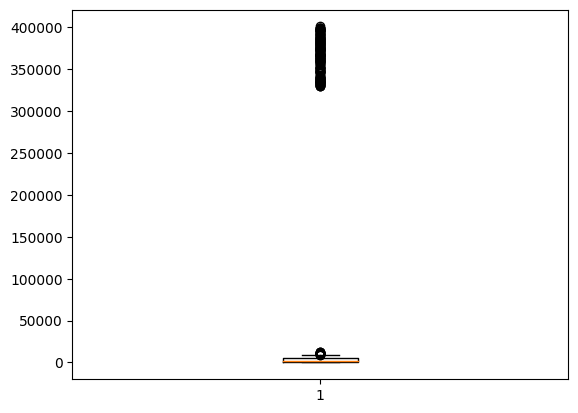

In [12]:
ax = plt.boxplot(df.days_employed,
            whis=1, # параметр, определяющий длину уса
            data = df)

In [14]:
def calc_boxplot(col):
    Q1, median, Q3 = np.percentile(np.asarray(df[col]), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
    wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival
# df_query = df
del_days0 = calc_boxplot('days_employed')[0]
del_days1 = calc_boxplot('days_employed')[1]
df = df.loc[df.days_employed>=del_days0]
df = df.loc[df.days_employed<=del_days1]
del_year0 = calc_boxplot('dob_years')[0]
del_year1 = calc_boxplot('dob_years')[1]
df = df.loc[df.dob_years>=del_year0]
df = df.loc[df.dob_years<=del_year1]
# for i in ['days_employed', 'dob_years']:
#     df_query = df_query.query(f"{i}>={calc_boxplot(i)[0]} and {i}<={calc_boxplot(i)[1]}")
# df = df_query

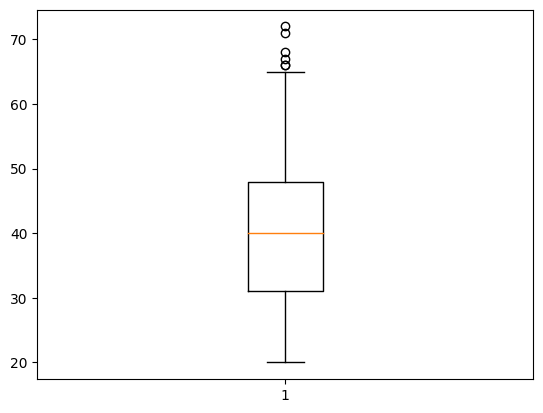

In [15]:
ax = plt.boxplot(df.dob_years,
            whis=1, # параметр, определяющий длину уса
            data = df)

In [16]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,debt
0,1,258,31,высшее,0,женат / замужем,0,M,0
1,0,2639,49,среднее,1,женат / замужем,0,F,0
2,2,109,40,среднее,1,женат / замужем,0,M,0
3,0,0,57,среднее,1,вдовец / вдова,2,F,0
4,0,1309,57,среднее,1,гражданский брак,1,F,0
...,...,...,...,...,...,...,...,...,...
994,0,1015,22,среднее,1,гражданский брак,1,M,0
995,0,1338,54,среднее,1,женат / замужем,0,F,0
996,1,547,56,среднее,1,вдовец / вдова,2,F,0
997,0,1571,50,среднее,1,в разводе,3,F,0
